# Fourier Transforms

A Fourier transform is a mathematical transformation that takes an existing function and decomposes it into an infinite series of sine or cosine waves of different periods and phases.  It has many uses in science (and in everyday life, as we'll see).  This tutorial will not discuss much of the mathematics behind the transform, but instead today we will concentrate on getting a better intuitive understanding of what Fourier transforms represent, and some ways they can be used. 

## Definitions

First, it's useful to define a few terms.  

### Continuous functions (e.g. mathematical functions)

Any function can be decomposed into a *Fourier series*, an infinite sum of sines and cosines of different frequencies.  (Another way to say this is that the set of sines and cosines of all frequencies is a complete basis set.) The coefficients of this infinite series for a given function are called the *Fourier coefficients* of that function.   The mathematical operation of determining these coefficients for a particular function is called a *Fourier transform*, which we'll refer to as FT for short. The *inverse Fourier transform* is (as the name implies) the inverse process, which when applied to the Fourier series, recovers the original function.  

###  Discrete data points (samples of functions at particular points)

When we're dealing with experimental data, we generally do not have continuous sampling of our function of interest.  For example, we might have time samples from observing a particular phenomenon at regular intervals.  This is also the case with digital representations of continuous waveforms, for example a digital audio file containing a certain number of samples of the audio waveform each second.  In this case, we need a slightly different mathematical operation, one that can operate on a discrete set of datapoints rather than on a function.  This operation is called a *discrete Fourier transform*, or DFT.  This operation can be computationally intensive, especially for large datasets, so people have settled upon a particularly efficient implementation of the discrete Fourier transform, called the *fast Fourier transform*, or FFT.  This is so common that "FFT" is sometimes used as being synonymous with "discrete Fourier transform". 

###  Time domain vs. Frequency domain

One important aspect of Fourier transforms is that the transform and inverse transform take us back and forth between different "spaces" or "domains".  This is easiest to see by considering an example.  If we have a dataset that is a function of time, then each point in our dataset represents the data at one particular time, e.g. 1 second, 2 seconds, etc.  When we Fourier transform that dataset, then each point in our new dataset represents the behavior of the data at one particular *frequency*, e.g. 1 Hz, 2 Hz, etc.  Note here that frequency is the inverse of time.  And in general it is true that each point in the FT has the inverse units of each point in the original data.  If our dataset represents spatial samples (e.g. elevation as a function of position, in units of meters), then the FT points will have units of 1/meters, i.e. they are *spatial* frequency.   The idea of spatial frequency might seem odd, but it is exactly analogous to temporal frequency.  Each point in that spatial FT represents the coefficient (amplitude and phase) of a sinusoidal wave with a particular wavelength, and how big or small it would have to be to add up to some particular rolling landscape.  Quickly varying terrain would need high (large) spatial frequencies, while slowly varying terrain would need low (small) spatial frequencies. 

Finally, implicit in this domain-switching idea is a key concept of Fourier analysis, and something that gives it much of its power:  any *one* point in one domain affects the *whole dataset* in the other domain.  This is perhaps easiest to see in going from time to frequency.  If I have a signal that is a pure sine wave, and I Fourier transform it, I only get one non-zero Fourier component, at whatever frequency point is need to represent that signal.  If I now change one other point in the Fourier transform(i.e. in the frequency domain) to be non-zero, and then transform back to the time domain, I have changed the whole signal, because I have added a second sinusoidal component, which will show up at *all* time points.   We'll experiment with this below. 

#### Single Sine Wave

In order to test out what Fourier transforms (FT) can do, we'll want to generate some fake datasets.  Sine waves are easy to deal with since we know what their FTs should look like. For our demo, we'll calculate a sine wave with a frequency of 0.5 Hz.

Let's use `numpy`'s `linspace` function to generate a set of time values that are evenly sampled between 0 and 10 seconds, which will give us five oscillation periods.  To start, we'll sample this interval with 100 points. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

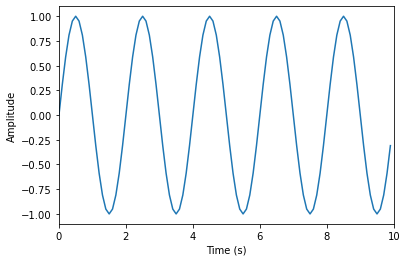

In [2]:
# Set up an array of evenly-spaced time points
n = 100
# Evenly space the points between zero and ten seconds
t = np.linspace(0,10,n,endpoint=False)
signal_freq = 0.5 #Hz (oscillation period is 2s)

# Calculate the sine wave with that period
# sin(\omega t)
sine_wave = np.sin(2.*np.pi*t*signal_freq)

plt.plot(t, sine_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,10)
plt.show()

This is our time-domain signal (amplitude versus time).

Note: we set the keyword "endpoint=False" to avoid duplicating the zero point at the end of the sine wave.   The reason for this is that the algorithm we will use to calculate our transform, the Fast Fourier Transform or FFT, assumes that our signal is perfectly periodic.  In other words, it assumes that you could place copies of the signal sequentially one after another with no discontinuities.  Having the zero point repeat would introduce a "blip" that's not part of a continuous sine wave.  

If we want to see how dense the discrete points are that sample this signal, we can plot them as points:

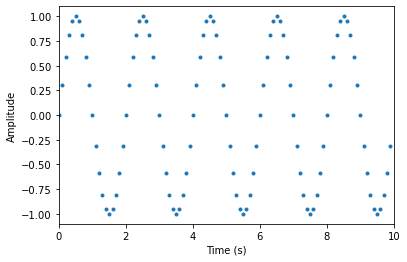

In [3]:
plt.plot(t, sine_wave, '.')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,10)
plt.show()

#### Fast Fourier Transform

Now let's Fourier transform our data. `Numpy` has a package called `fft`, which implements various version of the FFT (fast Fourier transform).  We'll use `np.fft.rfft` to compute the Fourier transform of your sine curve.   The `r` before `fft` there refers to the fact that we are only dealing with real data here.

In [4]:
sine_fft = np.fft.rfft(sine_wave)

If you examine the result, you will find that each component of the Fourier transform is a complex number, not a real number.  You can think of the real and imaginary parts of each component as relating to the *amplitude* and the *phase* of the sine wave at that frequency, or alternatively as the amplitudes of the sine and cosine terms at that frequency. Either way, you need two numbers to specify each contribution.

In [5]:
# here's an example point to demonstrate this
print(sine_fft[10])

(-1.3775158476152833e-15+9.542497145166359e-16j)


To get the frequencies corresponding to each point in the FT, we'll use `np.fft.rfftfreq`.  You need to pass it the number of points you used ($N$), and the step size ($\Delta t$). 

In [6]:
# Calculate the time step size in our array: this will be relevant for calculating real frequencies
# in Hz, because the frequencies given back by numpy's fft are just relative to this 
# native step size:
delta_t = t[1] - t[0]

# Calculate array of frequencies corresponding to amplitudes calculated above
freqs = np.fft.rfftfreq(n, delta_t)

Now let's plot the real and imaginary parts versus frequency so that we can see that the sine component at 0.5 Hz is nonzero and everything else (including the cosine component at 0.5 Hz) is zero.

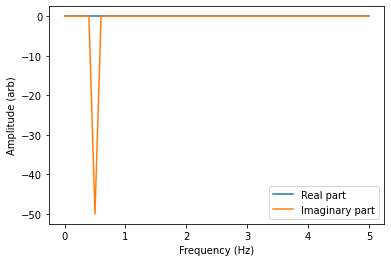

In [7]:
# Plot real and imaginary parts of FFT amplitude versus frequency
plt.plot(freqs, sine_fft.real, label='Real part')
plt.plot(freqs, sine_fft.imag, label='Imaginary part')
plt.ylabel('Amplitude (arb)')
plt.xlabel('Frequency (Hz)')
plt.legend()

Notice that the amplitude is negative.  This tells us about the *phase convention* for the FFT algorithm.  If we want a positive amplitude, we need $\sin(-\omega t)$, but we have plotted $\sin(\omega t)$.

Normally, we don't notice this when we look at the frequency content of a signal because we look at the *power spectrum*.  This allows us to see the amplitude in both the sine and the cosine components at the same time.  What we calculate is just the squared magnitude of the frequency-space amplitudes: 

Text(0.5, 0, 'Frequency (Hz)')

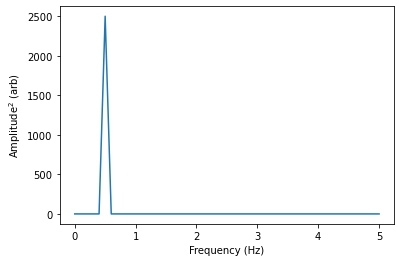

In [8]:
fft_power = np.abs(sine_fft)**2

plt.plot(freqs, fft_power)
plt.ylabel('Amplitude$^2$ (arb)')
plt.xlabel('Frequency (Hz)')

Remember that the frequency domain representation is equivalent to the time domain representation as long as we keep all of the information.  This means that we can recover the original signal if we use the full (complex) FFT but not if we only keep the magnitude.

First, we'll use the Inverse Fast Fourier Transform (ifft) to get back our sine wave, and then we'll see what happens when we throw away the phase information.

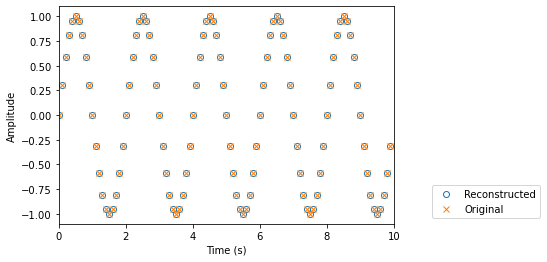

In [9]:
# Reconstruct sine wave in time domain
sine_reconstruction = np.fft.irfft(sine_fft)
# Plot original and reconstruction so we can see that they line up
plt.plot(t, sine_reconstruction, 'o', mfc='none', label='Reconstructed')
plt.plot(t, sine_wave, 'x', label='Original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,10)
plt.legend(bbox_to_anchor=(1.1,0.2))
plt.show()

#### A little about resolution and range

$N$ and $\Delta t$ are the only parameters you need to figure out which frequencies correspond to the amplitude information in the FFT. To see this, calculate the frequencies corresponding to your original signal, then calculate the frequencies corresponding to:
* a sample of 50 points covering the same 0 to 10 seconds
* a sample of 50 points covering only 0 to 5 seconds

Calculate the maximum frequency and the frequency resolution $\Delta f$ in each case, and verify the following:
* the maximum frequency is also $f_{samp}/2$, where $f_{samp} = 1/\Delta t$
* $\Delta f$ is given by $1/T$ where $T$ is the total time of the record

In [10]:
# Our original frequencies:

# Let's use the 'format' method of the string data type to print statements that have numbers in them.
# The curly braces {} are place holders.  
print("The frequency resolution with n = {} points covering 10s is: {} Hz".format(n, freqs[1]-freqs[0]))
print("The minimum frequency point is at {} Hz and the maximum frequency point is at {} Hz.".format(freqs[0], freqs[-1]))
print("delta_f = 1/T = {} s".format(1./(n*delta_t)))
print ("f_max = 1/2\Delta t = {} Hz".format(1./(2*delta_t)))
# If we want, we can use format specifications to specify how many decimal places, etc.
# The format code for a floating point number with two decimal places (as many digits as 
# necessary in front of the decimal, is ':.3f' 
print("With format specifications:")
print ("f_max = 1/2 Delta t = {:.3f} Hz \n".format(1./(2*delta_t)))
# The '\n' tells the print command to insert a new line (so there's a space)

# Now let's look at the other two situations:
n = 50
t = np.linspace(0,10,n,endpoint=False)
delta_t = t[1] - t[0]
freqs = np.fft.rfftfreq(n, delta_t) #10s / 50 points
print("The frequency resolution with n = {} points covering 10s is: {} Hz".format(n, freqs[1]-freqs[0]))
print("The minimum frequency point is at {:.2f} Hz and the maximum frequency point is at {:.2f} Hz.".format(freqs[0], freqs[-1]))
print("delta_f = 1/T = {} s".format(1./(n*delta_t)))
print ("f_max = 1/2 Delta t = {:.3f} s\n".format(1./(2*delta_t)))

t = np.linspace(0,5,n,endpoint=True)
delta_t = t[1] - t[0]
freqs = np.fft.rfftfreq(n, delta_t) #5s / 50 points
print("The frequency resolution with n = {} points covering 5s is: {} Hz".format(n, freqs[1]-freqs[0]))
print("The minimum frequency point is at {:.2f} Hz and the maximum frequency point is at {:.2f} Hz.".format(freqs[0], freqs[-1]))
print("delta_f = 1/T = {} s".format(1./(n*delta_t)))
print ("f_max = 1/2 Delta t = {:.3f} s\n".format(1./(2*delta_t)))

The frequency resolution with n = 100 points covering 10s is: 0.1 Hz
The minimum frequency point is at 0.0 Hz and the maximum frequency point is at 5.0 Hz.
delta_f = 1/T = 0.1 s
f_max = 1/2\Delta t = 5.0 Hz
With format specifications:
f_max = 1/2 Delta t = 5.000 Hz 

The frequency resolution with n = 50 points covering 10s is: 0.1 Hz
The minimum frequency point is at 0.00 Hz and the maximum frequency point is at 2.50 Hz.
delta_f = 1/T = 0.1 s
f_max = 1/2 Delta t = 2.500 s

The frequency resolution with n = 50 points covering 5s is: 0.196 Hz
The minimum frequency point is at 0.00 Hz and the maximum frequency point is at 4.90 Hz.
delta_f = 1/T = 0.196 s
f_max = 1/2 Delta t = 4.900 s



#### Note: 
I've done something highly inadvisable here, which is to use the same variable names over and over.  This is very convenient, but if you forget to recalculate some piece, then the old value will still be available.  You won't get an error message, but you may not be calculating what you think you are calculating.

#### Exercise 1
Let's say that the signal you have is not pure sine or cosine.  In other words, it has a non-trivial phase.  

>a) Construct a sine wave with a frequency of 0.5 Hz and a phase of $\pi/7$ radians at $t=0$.
>
>b) Now look at your signal in the frequency domain:
>
>* On one plot, show the real and imaginary parts of the FT, plotted as a function of frequency.  Label each axis appropriately.  
>
>* On a second plot, show the *power spectrum* of the FT, as a function of frequency.  The power spectrum is the squared amplitudes of the FT components, and is a useful way to see which Fourier components (i.e. which frequencies) are strongest.  Recall that for a complex number $a + bi$, the modulus is $\sqrt{a^2 + b^2}$.  We want the square of that, which you can calculate for a complex number $x$ by using `np.abs(x)**2`.
>
> Comment on what you see.  Make sure that the plots you get (especially the power spectrum) make sense to you, given the input signal you used. 

#### Interlude on array copies


In preparation for the next step, we need to note one coding tip.  We're going to be messing with the FFT array, so it will be a good idea to work on a *copy* of the array, so that we don't inadvertently change multiple different points and thus get unexpected results.  You can get an independent copy of a `numpy` array using `.copy()`, like this:

`x = y.copy()`

Below is a bit more on how this works:

In [11]:
a = np.array([1,2,3])
b = a.copy()  # Now b can be changed without affecting a. 
b[1] = 100
print("Working with a copy, b = a.copy()")
print("a is", a)
print("b is", b)

# Note that this does *not* make b independent:
a = np.array([1,2,3])
b = a      
#  Here b is just a "view" of a, so changing b changes a:
b[1] = 100
print("Working with view, b = a")
print("a is", a)
print("b is", b)


Working with a copy, b = a.copy()
a is [1 2 3]
b is [  1 100   3]
Working with view, b = a
a is [  1 100   3]
b is [  1 100   3]


#### Exercise 2

Now let's see how a tweak in the frequency domain transforms back to a different signal in the time domain. 

* Make a copy of the FFT array to work with. 
* Pick one point in this FFT array, and change its amplitude to be comparable to that of the largest peak.  
* Re-plot the power spectrum to make sure it looks like you expect. 
* Transform that FFT array back into the time domain using `np.fft.irfft`, and plot the resulting time series. 
* Explain why the result you get is what you should expect. 


###  Uses of Fourier transforms: finding periodicities in time series data

As we've seen, the power spectrum contains very clear information about what periodic signals are present in a dataset.  So far, we've only used very clean sine waves to see that, but it turns out that the Fourier transform is quite robust at picking out periodic signals even if they are heavily obscured by noise in a dataset (as long as the noise is random, and not periodic itself).  

#### Exercise 3

Using the same array of time values as above, generate a new signal that is the sum of two different frequency sine waves.  Also generate an array of "noise" values, with comparable amplitude to the signal.  Since real experimental noise often follows a Gaussian (or normal) distribution, a good way to do this is to generate a set of random numbers using `np.random.normal` (look up the usage online, and note in particular the `scale` parameter.)  This is often a useful way to see how noise might affect an experiment you're planning (or have already carried out.) 

* Plot your original signal. 
* Plot the signal with noise added. 
* Plot the power spectrum of the noisy data - can you find the input frequencies? 
* Play around with how big you make the noise component, making it big enough that it is hard to see clearly the signal in the original data.  Does the FT power spectrum still pull out the right frequencies? 

The FFT is capable of recovering the frequency information even when the scale of the noise is as big as the signal itself.

## Audio filtering and compression

Another use of Fourier transforms is in audio signal processing.  They have wide applicability in filtering or modifying signals, and in compressing the files.  In its simplest form, a digital audio file is just a series of time samples of the audio waveform, very analogous to the simple time series we have been working with above.  Here we'll read one of these in from a file, storing it as a `numpy` array, and we'll be able to work with just as we have above. 

For the exercises below, you may find it useful to know that the frequency range of human hearing is approximately 20 Hz to 20 kHz.  Use this as a sanity check on your plots - you may see frequencies somewhat outside this range, but if the frequencies you are plotting are wildly different, you have probably made a mistake somewhere. 

If you happen to like the song, you can find it here:
<https://carnecruda.bandcamp.com/album/i-love-you-more-than-tacos>

The shape of the audio data array is (399891, 2)
The audio is sampled at a rate of 44.1 kHz.
The clip is 9.1 seconds long.


C:\Users\adamd\AppData\Local\Temp/ipykernel_8788/3469992772.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audiodata = wv.read(audiofile)


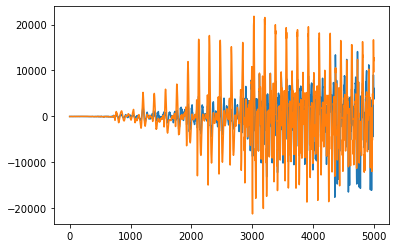

In [31]:
# Here's some sample code to show you how to read audio into a numpy array:
import scipy.io.wavfile as wv

# Here's the first few seconds of "I love you more than tacos," by Carne Cruda
audiofile = 'i_love_you_more_than_tacos_clip.wav'

# This returns both the data and the sampling rate, which is the 
# inverse of the time step.  You'll need to pass this to the 
# np.fft.fftfreq routine to get the proper frequencies back. 
sample_rate, audiodata = wv.read(audiofile)
print("The shape of the audio data array is", audiodata.shape)
# This is a stereo file, so there are two audio channels
nchannels = 2
channel1 = audiodata[:,0]
channel2 = audiodata[:,1]

print("The audio is sampled at a rate of %0.1f kHz." % (sample_rate/1000.))
print("The clip is %0.1f seconds long." % (audiodata.size/sample_rate/nchannels))

# Show a little of the data so that we can see what it looks like
plt.plot(audiodata[:5000,:])
# This is just a plot of the two channels versus index (sample number)
# because we didn't give it an x array to plot

# We can also embed an audio player directly in the notebook:
import IPython.display as disp
disp.display(disp.Audio(data=audiodata.transpose(), rate=sample_rate))
# We have to transpose the audiodata array, otherwise it thinks we have 
# a ton of channels with just two time points each....

# If we want to play just one channel or the other, we can do that too.
disp.display(disp.Audio(data=channel1, rate=sample_rate))

disp.display(disp.Audio(data=channel2, rate=sample_rate))

#### Interlude on masking/selecting pieces of arrays

Sometimes we need to extract a piece of an array that's conditioned on the data in a different array.  For example, let's say we want to look at the spectrum of our audio and suppress all of the frequencies below a certain point.  One way to do this is to use a condition to select a piece of an array and set that to zero.

Here's a quick example.  Let's say we have an array of times at which we measure some signal, but we are sure that times before 4 seconds into the record are just noise.  Let's set all of that data to zero so we don't get confused:

In [13]:
#array of times
t_example = np.arange(10)
#build an array of random values -- let's pretend that only some of it is noise
y_example = np.random.randn((10))
print(t_example)
print(y_example)

[0 1 2 3 4 5 6 7 8 9]
[-0.29105883 -0.93743812 -0.12909363 -0.51701888 -0.18448614 -0.96233081
 -2.15731812 -1.21025823 -0.97165449  0.87641034]


In [14]:
#now let's set the condition we want to use to access/select our data
condition = t_example < 4 #data earlier than 4 seconds is noise, in our example
# this looks weird, right? 
# But it works -- the right hand side is evaluated first as a boolean (T/F) array:
print(t_example < 4)
# Then this array is assigned to the label 'condition'
print(condition)

# Now we can use this boolean array to pick out only indices where it is True
print(y_example[condition])

[ True  True  True  True False False False False False False]
[ True  True  True  True False False False False False False]
[-0.29105883 -0.93743812 -0.12909363 -0.51701888]


In [15]:
# We can also set elements of an array corresponding to those indices
y_example[condition] = 0
print(y_example)

[ 0.          0.          0.          0.         -0.18448614 -0.96233081
 -2.15731812 -1.21025823 -0.97165449  0.87641034]


Setting array elements to zero where a certain condition is met is called 'masking', and it's one way to accomplish the filtering that you are going to do in exercise 5.

#### Exercise 4

For the above audio data (or a different .WAV file if you have one handy to play around with), plot the Fourier transform power spectrum vs. frequency.  You can work with a single channel rather than the stereo array if it is easier.  Since human hearing spans three decades of frequency, it may be useful to make this plot have a logarithmic x axis.

(399891,)
(199946,)
(199946,)


(10, 3000)

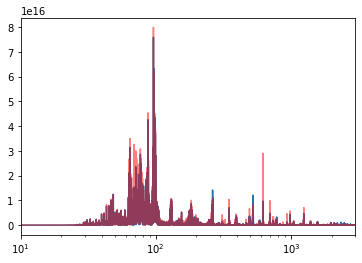

In [36]:
ch1fft = np.fft.rfft(channel1)
ch2fft = np.fft.rfft(channel2)
delta_t = 1./sample_rate
audio_time = np.arange(0,delta_t*channel1.size,delta_t)
audio_freqs = np.fft.rfftfreq(channel1.size, delta_t)
ch1power = np.abs(ch1fft)**2
ch2power = np.abs(ch2fft)**2

print(channel1.shape)
print(audio_freqs.shape)
print(ch1fft.shape)

plt.semilogx(audio_freqs, ch1power)

plt.semilogx(audio_freqs, ch2power, alpha=0.5, color='r')
plt.xlim(10,3000)

#### Exercise 5

Now let's do something with the audio! 

* Split the frequency spectrum in half, i.e. figure out a frequency in the middle of the range.  (You might want to think about what frequency makes the most sense here - arithmetic mean?  geometric mean?  something else?)   
* Generate a 'mask' or condition to pass only certain frequencies.  Remember, you can create a numpy boolean array with the same dimensions as array `x` by using a statement like `big = x > 1000`; your array `big` will then be True whereever the array `x` had values greater than 1000. 
* Using your mask array, create a new copy of the FT with all of the high frequency components set to zero.  This is a 'perfectly sharp' low-pass filter.  Inverse transform the FT, and play the resulting audio.  How does it sound? 
* Do the same thing, but this time zero out the lows, and play the result. 

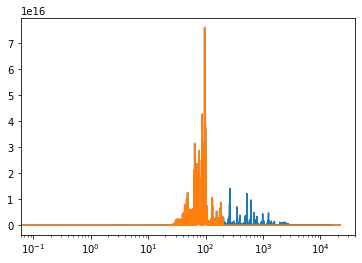

In [39]:
f_threshold = 200.
# condition for setting high frequencies to zero power
low_pass_condition = audio_freqs > f_threshold

low_pass_ch1fft = ch1fft.copy()
low_pass_ch1fft[low_pass_condition] = 0

low_pass_ch1power = np.abs(low_pass_ch1fft)**2

plt.semilogx(audio_freqs, ch1power)
plt.semilogx(audio_freqs, low_pass_ch1power)

low_pass_ch1 = np.fft.irfft(low_pass_ch1fft)

disp.display(disp.Audio(data=low_pass_ch1, rate=sample_rate))


#### Exercise 6 (optional)

Often it is useful to be able to compress a signal, so that, e.g., all those music files don't take up a lot of space on your computer or your phone. The above techniques are one form of compression - they reduce the amount of data we're dealing by a factor of two!  (At least they would if we only stored the Fourier transform in the file - you can check for yourself that the inverse-transformed audio file is the same size as before.)  But the resulting sound is pretty bad. Obviously, if possible we'd prefer to do something that doesn't distort the sound so much, but still reduces the file size. 

One very simple way to do this is to look at the FT power spectrum, and throw away components with very low power.  By definition, these contribute less to the final overall signal, but it costs us just as much storage space to store a floating-point number with a low value as to store one with a high value.  Instead, we just set the low-power components to zero, and store the FT amplitudes and frequencies that are non-zero.  The software that reconstructs the sound for playback can be written to assume that any frequency not present in the FT has an amplitude of zero, and to fill in the grid before doing the inverse transform.

Try it:

* Find the entries in the FT power spectrum that have the lowest amplitudes, and set them all to zero.  Set your threshold so that you are discarding half the datapoints. (Hint: you can use np.median)
* Inverse transform, and play back the resulting audio.  Can you hear the difference? 
* Try it again, for other cutoff values (i.e. throwing out more or less data).  What percentage of datapoints do you need to discard before you start to hear a difference compared to the original audio? (Hint: use np.percentile to choose the threshold)